In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('D:\\Py_dataset\\temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


### 特征说明

 * year：年份
 * month：月份
 * day：天
 * temp_2：前天的最高温度
 * temp_1：昨天的最高温度
 * average：在历史中，每年这天的平均最高温度
 * actual：实际温度

In [3]:
#数据规模
df.shape

(348, 9)

In [4]:
#该数据集的基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
year       348 non-null int64
month      348 non-null int64
day        348 non-null int64
week       348 non-null object
temp_2     348 non-null int64
temp_1     348 non-null int64
average    348 non-null float64
actual     348 non-null int64
friend     348 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 24.5+ KB


In [5]:
#该数据集的统计特征

df.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


**1.数据预处理**

In [6]:
# 时间特征预处理

import datetime

years = df['year']
months = df['month']
days = df['day']

#datetime格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year,month,day in zip(years,months,days)]

dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

In [7]:
df = pd.get_dummies(df)
df.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


总体来说，该数据集比较干净。其数据预处理工作进行了两项任务，时间（日期）数据的标准化处理，对类别数据进行了one_hot_encoding编码。

**2.特征展示**

In [8]:
plt.style.use('fivethirtyeight')

C:\Users\taon1\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Friend estimate Temp')

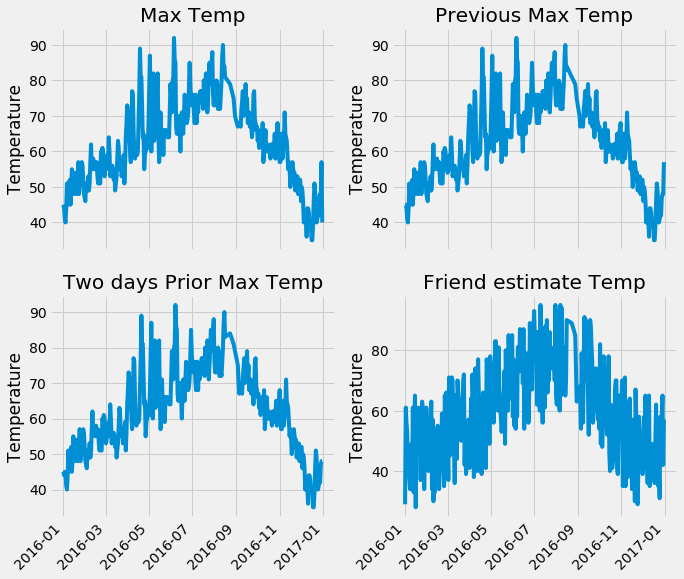

In [9]:
# 展示4个特征，temp_2,temp_1,actual,friend

#设置布局
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
fig.autofmt_xdate(rotation = 45)

#标签值
ax1.plot(dates,df['actual'])
ax1.set_xlabel('');ax1.set_ylabel('Temperature');ax1.set_title('Max Temp')

#昨天温度
ax2.plot(dates,df['temp_1'])
ax2.set_xlabel('');ax2.set_ylabel('Temperature');ax2.set_title('Previous Max Temp')

#前天温度
ax3.plot(dates,df['temp_2'])
ax3.set_xlabel('');ax3.set_ylabel('Temperature');ax3.set_title('Two days Prior Max Temp')

#朋友猜测的温度
ax4.plot(dates,df['friend'])
ax4.set_xlabel('');ax4.set_ylabel('Temperature');ax4.set_title('Friend estimate Temp')

**3.切分数据**

In [10]:
labels = df['actual']
labels = np.array(labels)


features = df.drop('actual',axis = 1)

feature_list = list(features.columns)

features = np.array(features)

In [11]:
from sklearn.model_selection import train_test_split

train_features,test_features,train_labels,test_labels = train_test_split(features,labels,test_size = 0.25,random_state = 0)

print('训练特征:',train_features.shape)
print('训练标签:',train_labels.shape)
print('测试特征:',test_features.shape)
print('测试标签:',test_labels.shape)

训练特征: (261, 14)
训练标签: (261,)
测试特征: (87, 14)
测试标签: (87,)


**4.建立随机森林模型**

In [12]:
from sklearn.ensemble import RandomForestRegressor

#先建立1000棵树的RF模型

RF = RandomForestRegressor(n_estimators = 1000,random_state = 0)
RF.fit(train_features,train_labels)
predictions = RF.predict(test_features)

#评价指标MSE
from sklearn.metrics import mean_squared_error
result = mean_squared_error(test_labels,predictions)
RMSE = np.sqrt(result)
print('预测结果的误差:',RMSE)

预测结果的误差: 4.920974926768583


**5.树模型的可视化**

In [13]:
from sklearn.tree import export_graphviz
import pydot

#从随机森林中随机选择一棵树
tree = RF.estimators_[5]
#导出dot文件
export_graphviz(tree,out_file = 'tree.dot',feature_names = feature_list,rounded = True,precision = 1)

#绘图
(graph,) = pydot.graph_from_dot_file('tree.dot')

#展示
graph.write_png('tree.png')

FileNotFoundError: [WinError 2] "dot" not found in path.

In [17]:
#把模型以及要用到的特征输入进来，转化为dot_data类型
from sklearn import tree

tree1 = RF.estimators_[5]
dot_data = \
    tree.export_graphviz(
        tree1,
        out_file = None,
        feature_names = feature_list,
        filled = True,
        impurity = False,
        rounded = True
    )

In [19]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())

graph.write_png('tree.png')

True

In [20]:
#限制下树模型

small_RF = RandomForestRegressor(n_estimators = 10,max_depth = 3,random_state = 0)
small_RF.fit(train_features,train_labels)

tree2 = small_RF.estimators_[4]

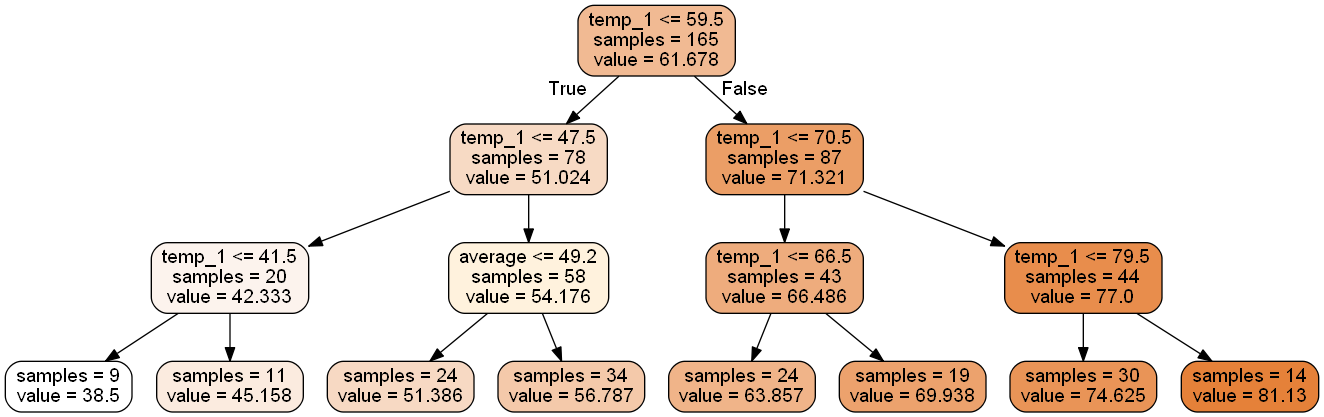

In [21]:
dot_data = \
    tree.export_graphviz(
        tree2,
        out_file = None,
        feature_names = feature_list,
        filled = True,
        impurity = False,
        rounded = True
    )

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())

**6.特征的重要性**

In [22]:
RF.feature_importances_

array([0.        , 0.0109045 , 0.01945424, 0.02204945, 0.51800532,
       0.38901991, 0.02113454, 0.00219089, 0.00655828, 0.00212262,
       0.00229808, 0.00160136, 0.0019517 , 0.00270913])

In [24]:
importances = list(RF.feature_importances_)
feature_importances  = [(feature,round(importance,2)) for feature,importance in zip(feature_list,importances)]

feature_importances  = sorted(feature_importances,key = lambda x:x[1],reverse = True)

In [25]:
feature_importances[:5]

[('temp_1', 0.52),
 ('average', 0.39),
 ('day', 0.02),
 ('temp_2', 0.02),
 ('friend', 0.02)]

In [26]:
[print('Variable:{:20} Importance :{}'.format(*pair)) for pair in feature_importances]

Variable:temp_1               Importance :0.52
Variable:average              Importance :0.39
Variable:day                  Importance :0.02
Variable:temp_2               Importance :0.02
Variable:friend               Importance :0.02
Variable:month                Importance :0.01
Variable:week_Mon             Importance :0.01
Variable:year                 Importance :0.0
Variable:week_Fri             Importance :0.0
Variable:week_Sat             Importance :0.0
Variable:week_Sun             Importance :0.0
Variable:week_Thurs           Importance :0.0
Variable:week_Tues            Importance :0.0
Variable:week_Wed             Importance :0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Variable Importances')

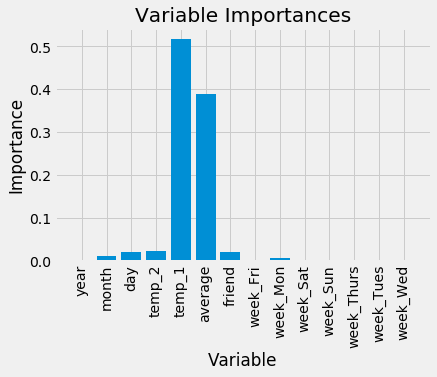

In [29]:
x_values = list(range(len(importances)))
#绘图
plt.bar(x_values,importances)
plt.xticks(x_values,feature_list,rotation = 90)
plt.xlabel('Variable');plt.ylabel('Importance');plt.title('Variable Importances')

In [33]:
RF_most_important = RandomForestRegressor(n_estimators = 1000,random_state = 0)

#选取两个最重要的特征
important_indices = [feature_list.index('temp_1'),feature_list.index('average')]

RF_most_important.fit(train_features[:,important_indices],train_labels)
predictions = RF_most_important.predict(test_features[:,important_indices])

In [34]:
# 预测结果

RMSE = np.sqrt(mean_squared_error(predictions,test_labels))
RMSE

5.144075730064745

从均方误差来看，其值没有下降，反而上升了，说明其他特征还是有价值的，不能只凭特征的重要性就否定部分特征数据，一切都需要试验验证。

In [38]:
#对比真实数据与预测数据

years = features[:,feature_list.index('year')]
months = features[:,feature_list.index('month')]
days = features[:,feature_list.index('day')]
dates = [str(int(year)) + '-' + str(int(month)) +'-'+ str(int(day)) for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]
#创建一个表格，用于保存日期和真实值
true_data = pd.DataFrame(data = {'date':dates,'actual':labels})

#创建一个表格，用于保存预测值
test_years = test_features[:,feature_list.index('year')]
test_months = test_features[:,feature_list.index('month')]
test_days = test_features[:,feature_list.index('day')]
test_dates = [str(int(year)) + '-' + str(int(month)) +'-'+ str(int(day)) for year,month,day in zip(test_years,test_months,test_days)]
test_dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in test_dates]

#创建随机森林模型
RF = RandomForestRegressor(n_estimators = 1000,random_state = 0)
RF.fit(train_features,train_labels)
predictions = RF.predict(test_features)

test_temp = pd.DataFrame(data = {'test_date':test_dates,'pred_temp':predictions})

In [39]:
true_data.iloc[:5]

,date,actual
0,2016-01-01,45
1,2016-01-02,44
2,2016-01-03,41
3,2016-01-04,40
4,2016-01-05,44


In [40]:
test_temp.iloc[:5]

,test_date,pred_temp
0,2016-01-07,48.514
1,2016-02-24,57.942
2,2016-10-13,62.561
3,2016-02-17,54.867
4,2016-11-08,61.918


Text(0.5, 1.0, 'Temp changes with date')

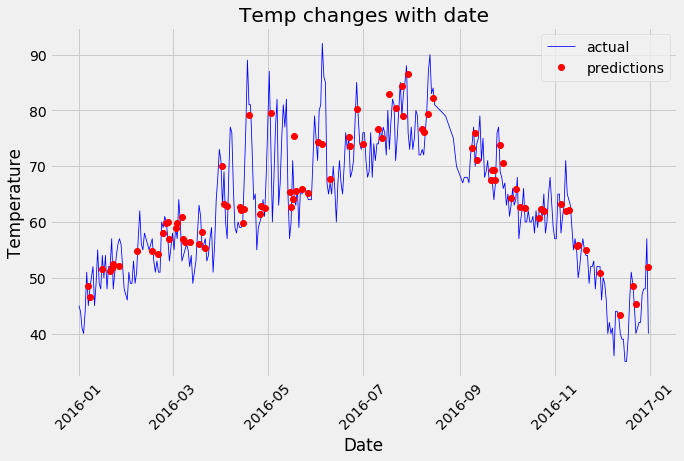

In [48]:
#绘制条形图

plt.figure(figsize = (10,6))
plt.plot(true_data['date'],true_data['actual'],'b-',linewidth = 0.8,label = 'actual')
plt.plot(test_temp['test_date'],test_temp['pred_temp'],'ro',label = 'predictions')
plt.legend(loc = 'best')

plt.xticks(rotation = 45)
plt.xlabel('Date');plt.ylabel('Temperature');plt.title('Temp changes with date')

从上图可以看出，模型预测的温度与真实数据基本上接近。

**关键问题**

 * 样本数的增加，会对模型效果产生什么影响？
 * 特征数量的增加，会对模型效果产生什么影响？
 * 对模型的运算效率会有何影响？

### 2. 数据与特征对结果影响分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('D:\\Py_dataset\\temps_extended.csv')
df.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [3]:
df.shape

(2191, 12)

**新增特征**
 * ws_1：前一天的风速
 * prcp_1：前一天的降水
 * snwd_1：前一天的降雪厚度

**1.数据切分**

In [4]:
#时间数据的标准化处理
import datetime

years = df['year']
months = df['month']
days = df['day']

dates = [str(int(year)) +'-'+ str(int(month)) +'-'+ str(int(day)) for year,month,day in zip(years,months,days)]
dates = [datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]

print(dates[:5])

[datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2011, 1, 2, 0, 0), datetime.datetime(2011, 1, 3, 0, 0), datetime.datetime(2011, 1, 4, 0, 0), datetime.datetime(2011, 1, 5, 0, 0)]


In [5]:
dates[:5]

[datetime.datetime(2011, 1, 1, 0, 0),
 datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 3, 0, 0),
 datetime.datetime(2011, 1, 4, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0)]

In [6]:
# 数据切分

labels = df['actual']
features = df.drop('actual',axis = 1)

C:\Users\taon1\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


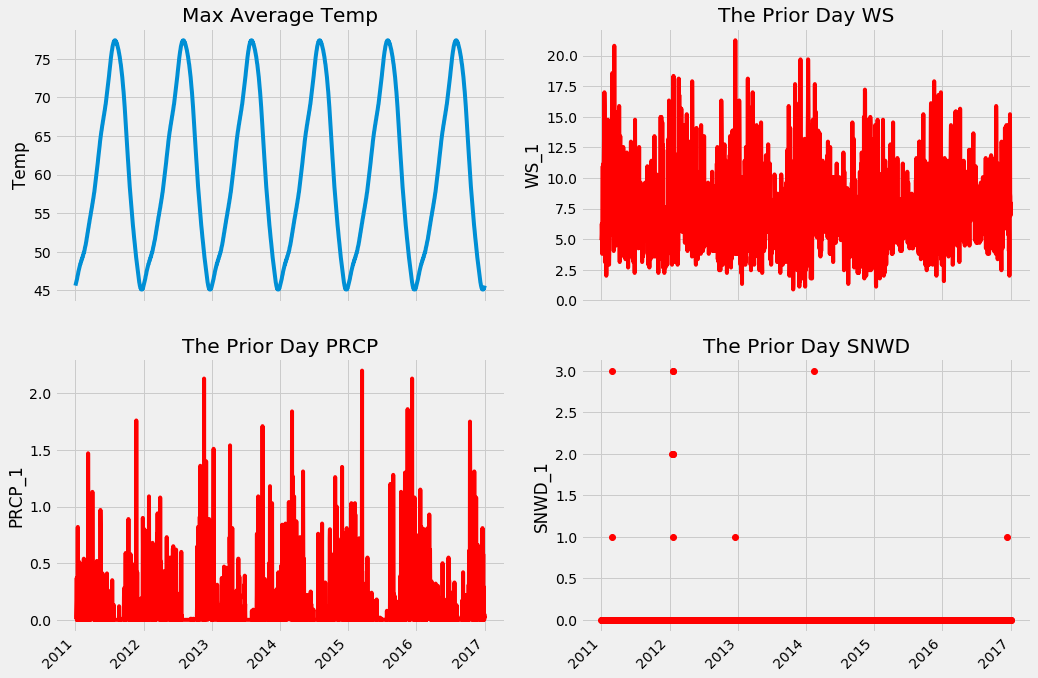

In [7]:
#观察特征的分布
plt.style.use('fivethirtyeight')

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols = 2,nrows = 2,figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

#平均最高气温
ax1.plot(dates,features['average'])
ax1.set_xlabel('');ax1.set_ylabel('Temp');ax1.set_title('Max Average Temp')

#前一天风速
ax2.plot(dates,features['ws_1'],'r-')
ax2.set_xlabel('');ax2.set_ylabel('WS_1');ax2.set_title('The Prior Day WS')

#前一天降水
ax3.plot(dates,features['prcp_1'],'r-')
ax3.set_xlabel('');ax3.set_ylabel('PRCP_1');ax3.set_title('The Prior Day PRCP')

#前一天的降雪量
ax4.plot(dates,features['snwd_1'],'ro')
ax4.set_xlabel('');ax4.set_ylabel('SNWD_1');ax4.set_title('The Prior Day SNWD')

plt.tight_layout(pad=2)

**2.特征工程 - 增加新特征**

In [8]:
# 创建一个新特征
seasons = []

for month in features['month']:
    if month in [12,1,2]:
        seasons.append('winter')
    elif month in [3,4,5]:
        seasons.append('spring')
    elif month in [6,7,8]:
        seasons.append('summer')
    elif month in [9,10,11]:
        seasons.append('autumn')
    
reduced_features = features[['temp_1','prcp_1','average','snwd_1']]
reduced_features['season'] = seasons

C:\Users\taon1\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


C:\Users\taon1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\taon1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


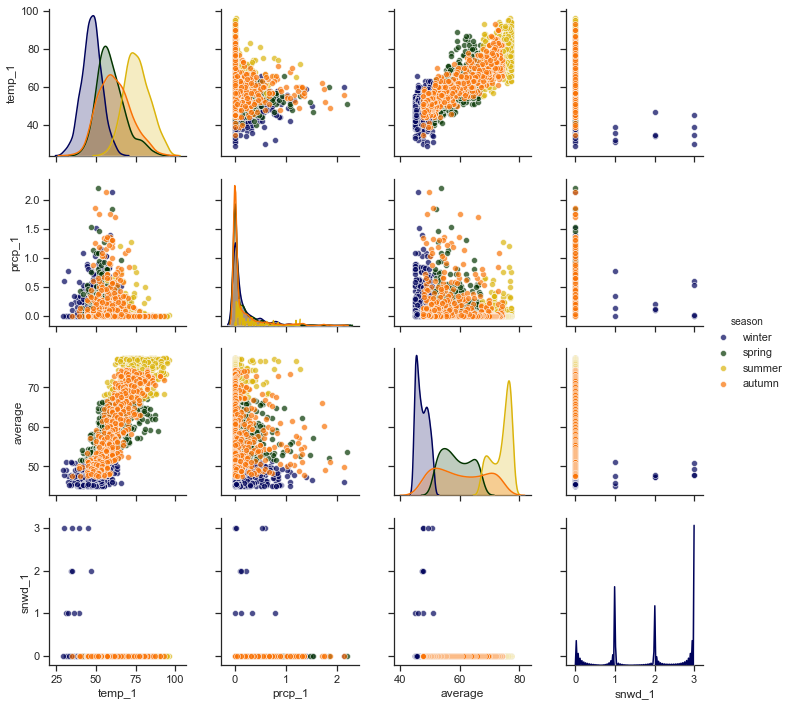

In [9]:
#观察reduced_features数据集上两两特征之间的关系

import seaborn as sns
sns.set(style = 'ticks',color_codes = True)

#创建你喜欢的调色板
palette = sns.xkcd_palette(['dark blue','dark green','gold','orange'])
#绘制pairplot

sns.pairplot(reduced_features,hue = 'season',diag_kind = 'kde',palette = palette,plot_kws = dict(alpha = 0.7),diag_kws = dict(shade = True))

In [10]:
feature_list = list(features.columns)

In [11]:
features = pd.get_dummies(features)

**3.观察样本数量的增加最模型效果的影响**

In [15]:
#对数据集进行切分
from sklearn.model_selection import train_test_split

train_features,test_features,train_labels,test_labels = train_test_split(features,labels,test_size = 0.25,random_state = 0)


print('训练集特征:',train_features.shape)
print('训练集标签:',train_labels.shape)
print('测试集特征:',test_features.shape)
print('测试集标签:',test_labels.shape)

训练集特征: (1643, 17)
训练集标签: (1643,)
测试集特征: (548, 17)
测试集标签: (548,)


In [16]:
#读取原始数据集
original_df = pd.read_csv('D:\\Py_dataset\\temps.csv')

original_labels = original_df['actual']
original_features = original_df.drop('actual',axis = 1)
original_feature_list = list(original_features)
original_features = pd.get_dummies(original_features)



#切分数据集
original_train_features,original_test_features,original_train_labels,original_test_labels = train_test_split(original_features,
                                                                                                             original_labels,
                                                                                                             test_size = 0.25,
                                                                                                             random_state = 0)

In [17]:
#创建一个新的多样本数据集

train_features_1 = train_features.drop(['ws_1','prcp_1','snwd_1'],axis=1)
train_labels_1 = train_labels
test_features_1 = test_features.drop(['ws_1','prcp_1','snwd_1'],axis=1)
test_labels_1 = test_labels

In [18]:
#建立同样的树模型,学习不同大小的训练集，测试相同的测试集
original_feature_list = list(original_features.columns)

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 100,random_state = 0)
RF.fit(original_train_features,original_train_labels)

original_predictions = RF.predict(test_features_1)

#使用mse指标对测试结果进行评估                                
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(original_predictions,test_labels_1)
RMSE = round(np.sqrt(MSE),2)

print('小样本训练集下的均方误差:',RMSE)

小样本训练集下的均方误差: 5.83


In [19]:
#建立相同的模型，学习更大样本的数据集

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 100,random_state = 0)
RF.fit(train_features_1,train_labels_1)

predictions = RF.predict(test_features_1)

#使用mse指标对测试结果进行评估                                
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(predictions,test_labels_1)
RMSE = round(np.sqrt(MSE),2)

print('大样本训练集下的均方误差:',RMSE)

大样本训练集下的均方误差: 5.35


In [20]:
print('样本数量增加，模型提神幅度:{}'.format(round(100*(5.83-5.35)/5.35),2),'%')

样本数量增加，模型提神幅度:9 %


**4.观察特征数量的增加，对结果的影响**

In [21]:
train_features.iloc[:5,:]

,year,month,day,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,friend,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
1717,2015,9,15,7.61,0.00,0,69,62,71.0,53,0,0,0,0,0,1,0
1732,2015,9,30,4.25,0.00,0,70,71,65.7,71,0,0,0,0,0,0,1
152,2011,6,2,5.82,0.17,0,61,59,67.6,59,0,0,0,0,1,0,0
427,2012,3,4,15.66,0.00,0,44,54,51.9,56,0,0,0,1,0,0,0
1783,2015,11,20,9.40,0.08,0,48,48,49.8,41,1,0,0,0,0,0,0


In [22]:
#创建RF模型
RF_exp = RandomForestRegressor(n_estimators = 100,random_state = 0)
RF_exp.fit(train_features,train_labels)
exp_predictions = RF_exp.predict(test_features)
MSE = mean_squared_error(exp_predictions,test_labels)
RMSE = np.sqrt(MSE)
print('exp模型的误差:',RMSE)

exp模型的误差: 5.193822165431869


In [28]:
print('特征增加后，模型的提升程度{}'.format(100*round((5.35-5.19)/5.35,2),'%'))

特征增加后，模型的提升程度3.0


**5.继续研究特征重要性这个指标**

In [31]:
importances = list(RF_exp.feature_importances_)
#将特征名字和数值组合在一起
feature_importances = [(feature,round(importance,2)) for feature,importance in zip(feature_list,importances)]
feature_importances = sorted(feature_importances,key=lambda x:x[1],reverse = True)

[print('Variable:{:20} Importance :{}'.format(*pair)) for pair in feature_importances]

Variable:temp_2               Importance :0.85
Variable:temp_1               Importance :0.05
Variable:weekday              Importance :0.02
Variable:average              Importance :0.02
Variable:year                 Importance :0.01
Variable:month                Importance :0.01
Variable:day                  Importance :0.01
Variable:ws_1                 Importance :0.01
Variable:snwd_1               Importance :0.01
Variable:prcp_1               Importance :0.0
Variable:friend               Importance :0.0


[None, None, None, None, None, None, None, None, None, None, None]

从以上结果可以看出，对结果影响最大的两个特征是temp_2，temp_1。ws_1对结果的影响较小。

Text(0.5, 1.0, 'Feature Impotances')

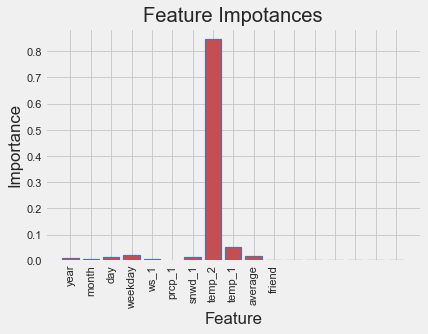

In [33]:
#特征重要性程度可视乎
plt.style.use('fivethirtyeight')

x_vars = list(range(len(importances)))
plt.bar(x_vars,importances,orientation = 'vertical',color = 'r',edgecolor = 'b',linewidth = 1.2)
plt.xticks(x_vars,feature_list,rotation = 90)
plt.xlabel('Feature');plt.ylabel('Importance');plt.title('Feature Impotances')

In [34]:
feature_importances[:5]

[('temp_2', 0.85),
 ('temp_1', 0.05),
 ('weekday', 0.02),
 ('average', 0.02),
 ('year', 0.01)]

Text(0.5, 1.0, 'Cumsum Feature Importances')

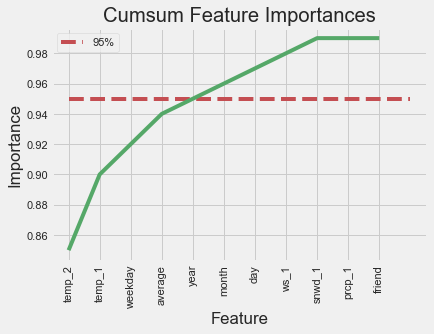

In [45]:
#提取已排好序的特征和数值

sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_vars = range(11)
#累计特征的重要性
cumulative_importance = np.cumsum(sorted_importances)
#绘制折线图
plt.plot(x_vars,cumulative_importance,'g-')
#绘制阈值线
plt.hlines(y = 0.95,xmin = 0,xmax = len(sorted_features),color = 'r',linestyle = 'dashed',label = '95%')
plt.legend(loc = 'best')
#x轴
plt.xticks(x_vars,sorted_features,rotation = 90)
#标注
plt.xlabel('Feature');plt.ylabel('Importance');plt.title('Cumsum Feature Importances')

由图可见，前五个的特征累加的重要性和达到了95%。接下来选取前五个特征作为数据集的特征。

In [49]:
#选择这些特征
important_feature_names = [feature[0] for feature in feature_importances[:5]]
important_indices = [feature_list.index(feature) for feature in important_feature_names]

#重新创建训练集
important_train_features = train_features.iloc[:,important_indices]
important_test_features = test_features.iloc[:,important_indices]
#数据维度
print('Important train features shape:',important_train_features.shape)
print('Important test features shape:',important_test_features.shape)

#再次训练模型
exp_RF = RandomForestRegressor(n_estimators = 100,random_state = 0)
exp_RF.fit(important_train_features,train_labels)
reduced_predictions = exp_RF.predict(important_test_features)
MSE = mean_squared_error(test_labels,reduced_predictions)
RMSE = np.sqrt(MSE)
print('reduced模型精度:',RMSE)

Important train features shape: (1643, 5)
Important test features shape: (548, 5)
reduced模型精度: 5.245160734561607


In [50]:
model_result = pd.DataFrame(data = {'Model':['original data','full data','reduced features'],'RMSE':[5.83,5.19,5.24]})
model_result

,Model,RMSE
0,original data,5.83
1,full data,5.19
2,reduced features,5.24


对比三种模型，可以看出在全样本数据集下，模型的精度最高。

### 3.模型调参

**31.随机参数选择**

In [51]:
from sklearn.model_selection import RandomizedSearchCV

#建立树的个数
n_estimators = [int(x) for x in np.linspace(start = 200,stop = 2000,num = 10)]

#最大特征的选择方式
max_features = ['auto','sqrt']

#树的最大深度
max_depth = [int(x) for x in np.linspace(10,20,num =2)]
max_depth.append(None)

#节点可分裂所需要的最小样本数
min_samples_split = [2,5,10]

#叶子结点最小样本数
min_samples_leaf = [1,2,4]

#样本采样方法
bootstrap = [True,False]

#随机参数空间
random_grid = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,
              'min_samples_split':min_samples_split,'bootstrap':bootstrap}

In [52]:
RF = RandomForestRegressor()
RF_random = RandomizedSearchCV(RF,param_distributions = random_grid,n_iter=100,scoring = 'neg_mean_squared_error',
                              cv = 3,verbose=2,random_state = 42,n_jobs = -1)

RF_random.fit(train_features,train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, None], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [53]:
RF_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [59]:
def model_evaluation(model,train_set,train_label,test_set,test_label):
    model.fit(train_set,train_label)
    predictions = model.predict(test_set)
    MSE = mean_squared_error(predictions,test_label)
    RMSE = np.sqrt(MSE)
    return RMSE

In [58]:
RF = RandomForestRegressor(n_estimators=1800,min_samples_split=10,min_samples_leaf=4,max_features='auto',random_state = 0)

In [60]:
print('模型效果:',model_evaluation(RF,train_features,train_labels,test_features,test_labels))

模型效果: 5.111886820330025


In [62]:
print('Random_RF模型效果提升:{}'.format(100*(5.19-5.11)/5.19),'%')

Random_RF模型效果提升:1.5414258188824674 %


随机参数空间搜索帮助我们确定了大致的参数范围，接下来我们将进一步调节参数。

**3.2.网格参数搜索**

In [65]:
from sklearn.model_selection import GridSearchCV

#创建参数空间
param_grid = {'n_estimators':[1600,1700,1800,1900,2000],
             'min_samples_split':[8,9,10,11,12],
             'min_samples_leaf':[3,4,5,6]}

RF = RandomForestRegressor()
Grid_RF = GridSearchCV(RF,param_grid = param_grid,scoring = 'neg_mean_squared_error',n_jobs = -1,cv=3,verbose = 2)

In [66]:
Grid_RF.fit(train_features,train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [1600, 1700, 1800, 1900, 2000], 'min_samples_split': [8, 9, 10, 11, 12], 'min_samples_leaf': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [67]:
Grid_RF.best_params_

{'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 1700}

In [70]:
grid_RF = RandomForestRegressor(n_estimators = 1700,min_samples_leaf = 6,min_samples_split = 9)

In [71]:
print('模型效果:',model_evaluation(grid_RF,train_features,train_labels,test_features,test_labels))

模型效果: 5.110432321187415


从模型的效果来看，这次的参数调优较上次优化幅度不大，可以确定最优参数的数值了。

In [72]:
model_result = pd.DataFrame(data = {'Model':['original data','full data','reduced features','opt model'],'RMSE':[5.83,5.19,5.24,5.11]})
model_result

,Model,RMSE
0,original data,5.83
1,full data,5.19
2,reduced features,5.24
3,opt model,5.11


In [78]:
model_varis = list(model_result['Model'])

In [79]:
model_values = list(model_result['RMSE'])

Text(0.5, 1.0, 'Different model result')

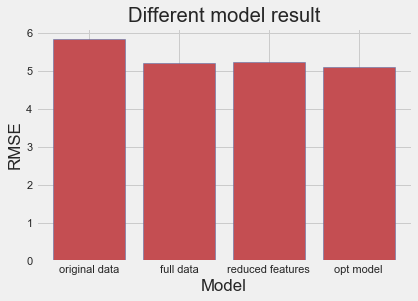

In [82]:
fig = plt.figure(figsize = (6,4))
plt.bar(range(len(model_varis)),model_values,color = 'r',edgecolor = 'b',orientation = 'vertical')
plt.xticks(range(len(model_varis)),model_varis,rotation = 0)
plt.xlabel('Model');plt.ylabel('RMSE');plt.title('Different model result')

### 4.项目总结

(1) 该项目由三部分构成，数据预处理，RF模型建立，参数调优。

(2) 该数据集数据比较整齐，所需要处理的部分不多。在此基础上，我们对数据做了特征工程，基于月份数据，新创建季节特征。

(3) 对比了不同样本量，不同特征量对最终结果的影响，可以确定更多的数据量，更多的样本特征，对于建立更好的模型是有帮助作用的。

(4) 特征选择，模型的RMSE值基本没有变化，模型的运算效率大大提升。具体情况需结合实际任务而确定。

(5) 参数调优，介绍了RandomizedSearchCV和GridSearchCV两种方法，两种方法可以结合使用，以确定模型的最优参数。

(6) 学会查阅参考文档，对于不懂的内容，学习，模仿，练习。